Vito,Saverio. (2016). Air Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C59K5F.

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
# data (as pandas dataframes) 
x = air_quality.data.features 
# none
y = air_quality.data.targets 
  
# metadata 
print("metadata")
print(air_quality.metadata) 
  
# variable information 
print("variables")
print(air_quality.variables) 

metadata
{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 'S. D. Vito, E. Mass

In [2]:
x["datetime"] = pd.to_datetime(x["Date"] + " " + x["Time"])

x = x.drop(columns=['Date', 'Time'])
x.where(x != -200, inplace=True)
x.dropna(inplace=True)
x.describe()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827
mean,2.353567,1207.879081,231.025393,10.771100,966.116082,143.501814,963.297461,100.259976,1600.620314,1045.812576,15.601451,49.050181,0.831853,2004-04-04 14:58:02.466747264
min,0.300000,753.000000,7.000000,0.500000,448.000000,12.000000,461.000000,19.000000,955.000000,263.000000,6.300000,14.900000,0.402300,2004-03-10 18:00:00
25%,1.300000,1017.000000,77.000000,4.800000,754.000000,81.000000,769.000000,78.500000,1369.500000,760.000000,11.900000,36.700000,0.718950,2004-03-24 11:30:00
50%,2.000000,1172.000000,157.000000,9.100000,944.000000,128.000000,920.000000,99.000000,1556.000000,1009.000000,15.000000,49.600000,0.817700,2004-04-02 18:00:00
75%,3.100000,1380.000000,318.500000,14.800000,1142.500000,187.000000,1131.000000,122.000000,1783.500000,1320.000000,18.300000,60.550000,0.927500,2004-04-15 16:30:00
max,8.100000,2040.000000,1189.000000,39.200000,1754.000000,478.000000,1935.000000,196.000000,2679.000000,2359.000000,30.000000,83.200000,1.485200,2004-05-01 00:00:00
std,1.409496,241.816997,208.461912,7.418134,266.424557,81.829717,265.914168,31.493823,302.291793,400.134662,4.825304,15.266746,0.178506,NaN


In [3]:
x.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00
5,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,2004-03-10 23:00:00
6,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,2004-03-11 00:00:00
7,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,2004-03-11 01:00:00
8,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,2004-03-11 02:00:00
11,0.7,1066.0,8.0,1.1,512.0,16.0,1918.0,28.0,1182.0,422.0,11.0,56.2,0.7366,2004-03-11 05:00:00


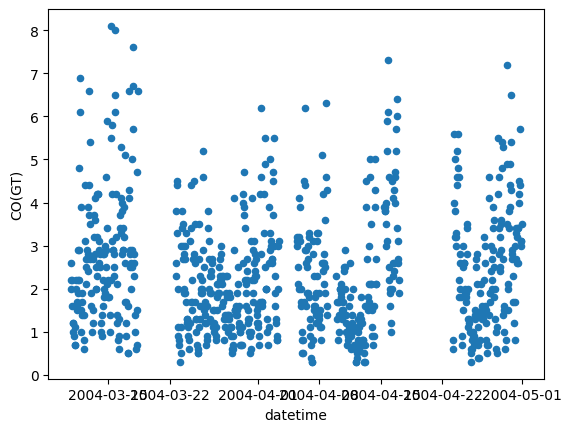

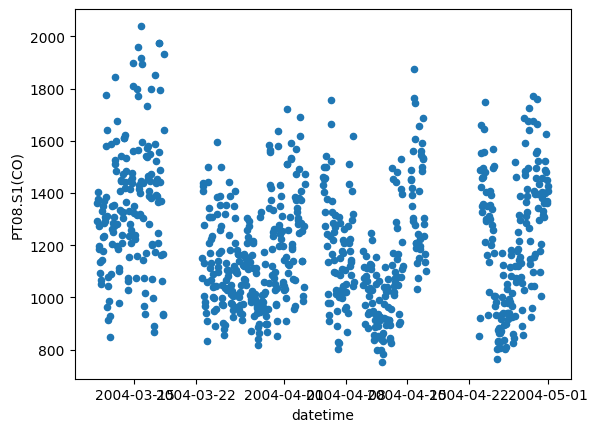

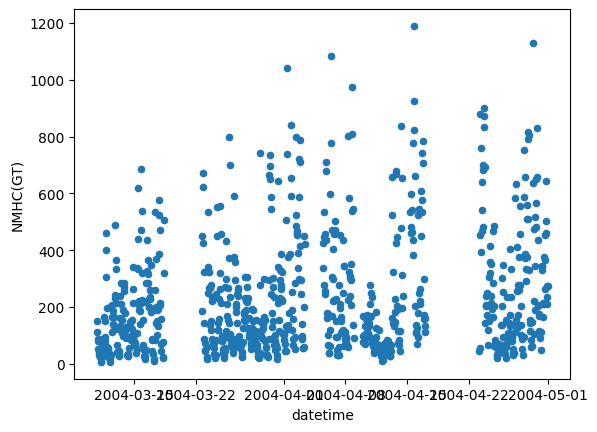

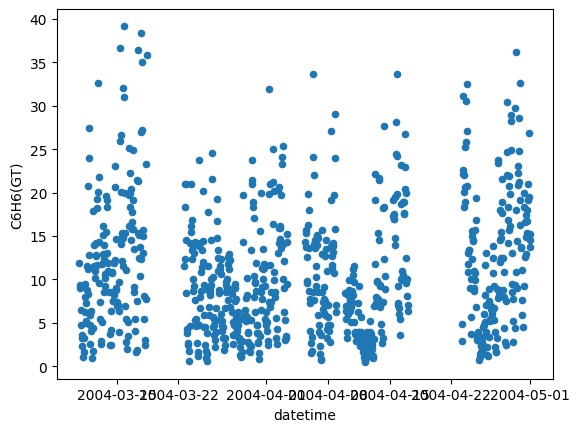

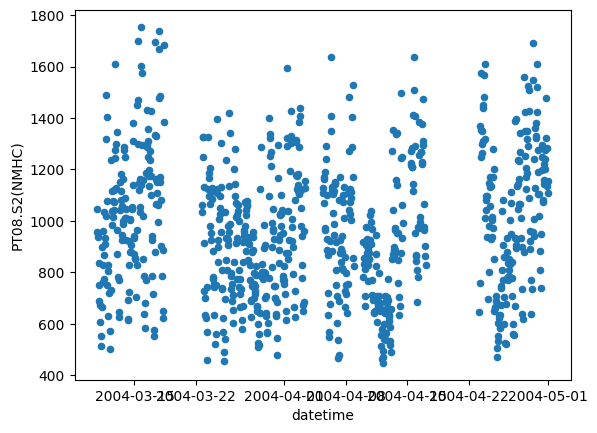

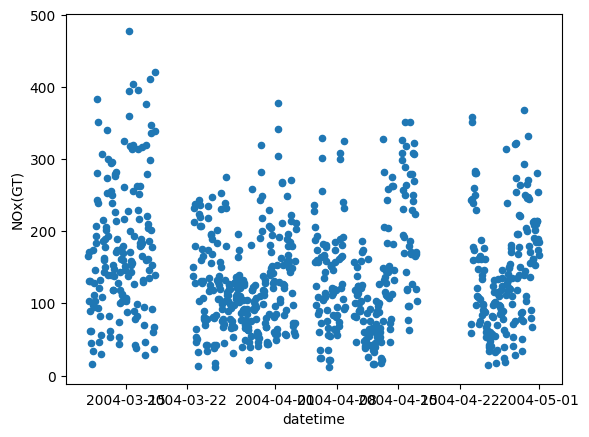

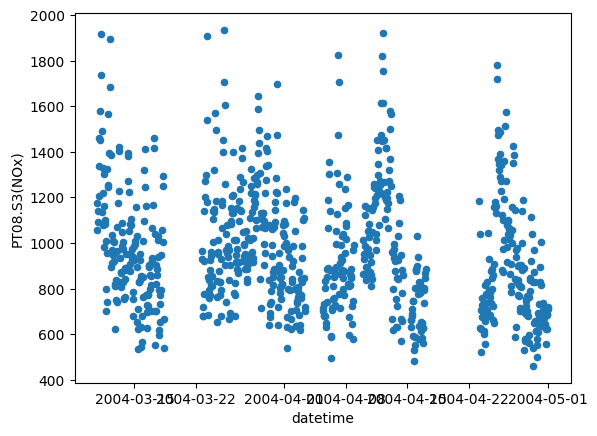

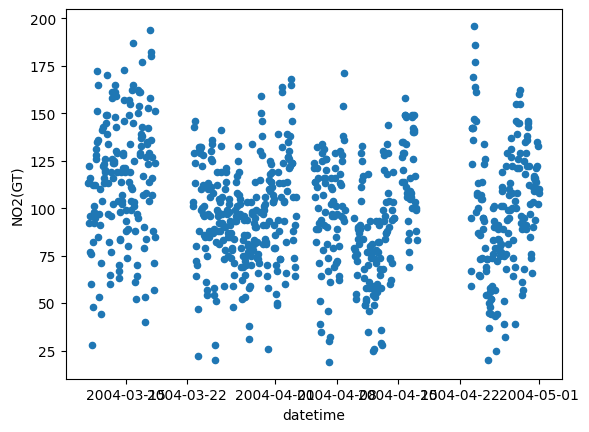

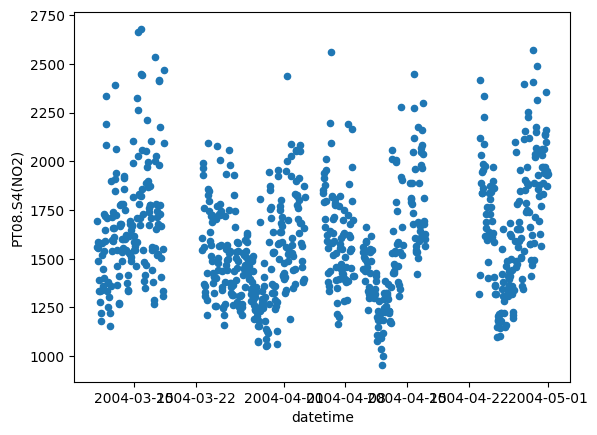

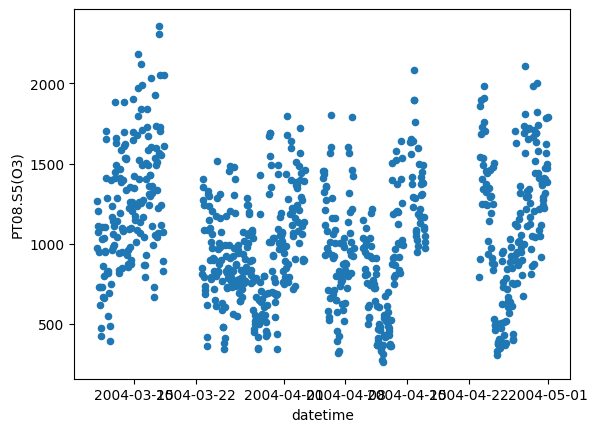

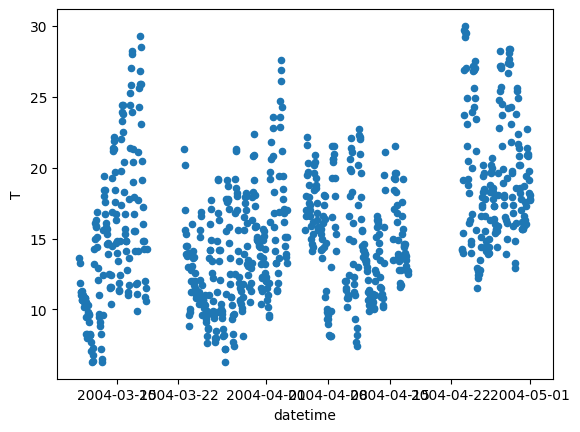

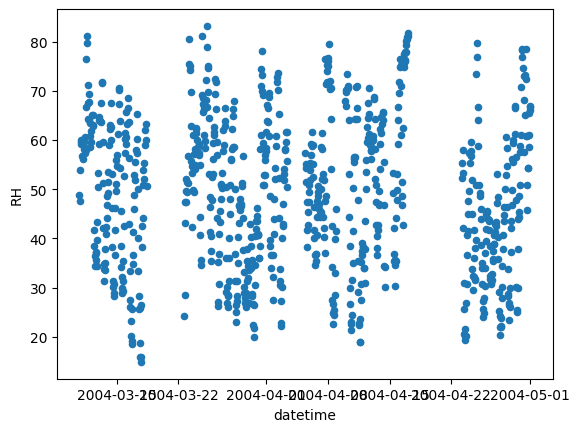

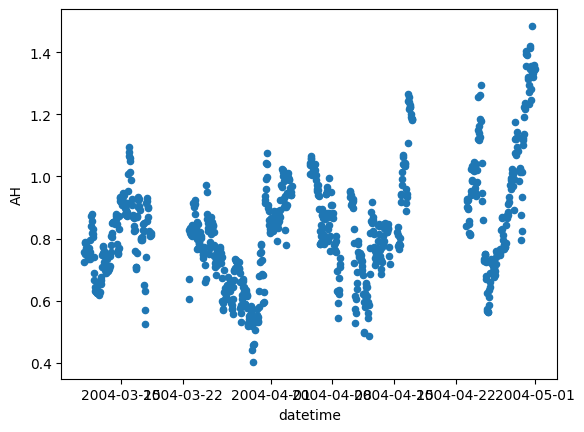

In [9]:
for c in x.columns:
    if (c != "datetime"):
        x.plot.scatter(x="datetime", y=c)
        